In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\chicago crime\Crimes_-_2001_to_Present\Crimes_-_2001_to_Present.csv")

In [3]:
df.head()

ID Case Number                    Date                      Block  \
0   5741943    HN549294  08/25/2007 09:22:18 AM         074XX N ROGERS AVE   
1     25953    JE240540  05/24/2021 03:06:00 PM        020XX N LARAMIE AVE   
2     26038    JE279849  06/26/2021 09:24:00 AM      062XX N MC CORMICK RD   
3  13279676    JG507211  11/09/2023 07:30:00 AM           019XX W BYRON ST   
4  13274752    JG501049  11/12/2023 07:59:00 AM  086XX S COTTAGE GROVE AVE   

   IUCR Primary Type                                        Description  \
0  0560      ASSAULT                                             SIMPLE   
1  0110     HOMICIDE                                FIRST DEGREE MURDER   
2  0110     HOMICIDE                                FIRST DEGREE MURDER   
3  0620     BURGLARY                                     UNLAWFUL ENTRY   
4  0454      BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0                OTHER   False     False  ...  49.0             1.0       08A   
1               STREET    True     False  ...  36.0            19.0       01A   
2          PARKING LOT    True     False  ...  50.0            13.0       01A   
3            APARTMENT   False     False  ...  47.0             5.0        05   
4   SMALL RETAIL STORE    True     False  ...   6.0            44.0       08B   

   X Coordinate Y Coordinate  Year              Updated On   Latitude  \
0           NaN          NaN  2007  08/17/2015 03:03:40 PM        NaN   
1     1141387.0    1913179.0  2021  11/18/2023 03:39:49 PM  41.917838   
2     1152781.0    1941458.0  2021  11/18/2023 03:39:49 PM  41.995219   
3     1162518.0    1925906.0  2023  11/18/2023 03:39:49 PM  41.952345   
4     1183071.0    1847869.0  2023  12/09/2023 03:41:24 PM  41.737751   

   Longitude                       Location  
0        NaN                            NaN  
1 -87.755969  (41.917838056, -87.755968972)  
2 -87.713355  (41.995219444, -87.713354912)  
3 -87.677975  (41.952345086, -87.677975059)  
4 -87.604856  (41.737750767, -87.604855911)  

[5 rows x 22 columns]

In [4]:
df['Primary Type'].value_counts()

Primary Type
THEFT                                1706621
BATTERY                              1473440
CRIMINAL DAMAGE                       920174
NARCOTICS                             753859
ASSAULT                               533135
OTHER OFFENSE                         501905
BURGLARY                              432699
MOTOR VEHICLE THEFT                   404639
DECEPTIVE PRACTICE                    364844
ROBBERY                               304347
CRIMINAL TRESPASS                     219510
WEAPONS VIOLATION                     115738
PROSTITUTION                           70055
OFFENSE INVOLVING CHILDREN             57977
PUBLIC PEACE VIOLATION                 53297
SEX OFFENSE                            32327
CRIM SEXUAL ASSAULT                    27480
INTERFERENCE WITH PUBLIC OFFICER       19059
LIQUOR LAW VIOLATION                   15115
GAMBLING                               14638
ARSON                                  13828
HOMICIDE                               132

In [5]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [6]:
df['Location'].value_counts()

Location
(41.976290414, -87.905227221)    14487
(41.754592961, -87.741528537)    10587
(41.883500187, -87.627876698)     8876
(41.897895128, -87.624096605)     4926
(41.909664252, -87.742728815)     3584
                                 ...  
(41.966553111, -87.785578247)        1
(41.779481459, -87.669776662)        1
(41.754936598, -87.561301714)        1
(41.745917682, -87.603968415)        1
(41.87515458, -87.633648765)         1
Name: count, Length: 899338, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077151 entries, 0 to 8077150
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

# Temporal Analysis

In [8]:
df['Date']=pd.to_datetime(df['Date'],format='%m/%d/%Y %I:%M:%S %p')

In [9]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['Hour']=df['Date'].dt.hour

In [10]:
crimes_per_year=df.groupby('Year').size()
crimes_per_month=df.groupby(['Year','Month']).size()
crimes_per_day=df.groupby(['Year','Month','Day']).size()
crimes_per_hour=df.groupby('Hour').size()

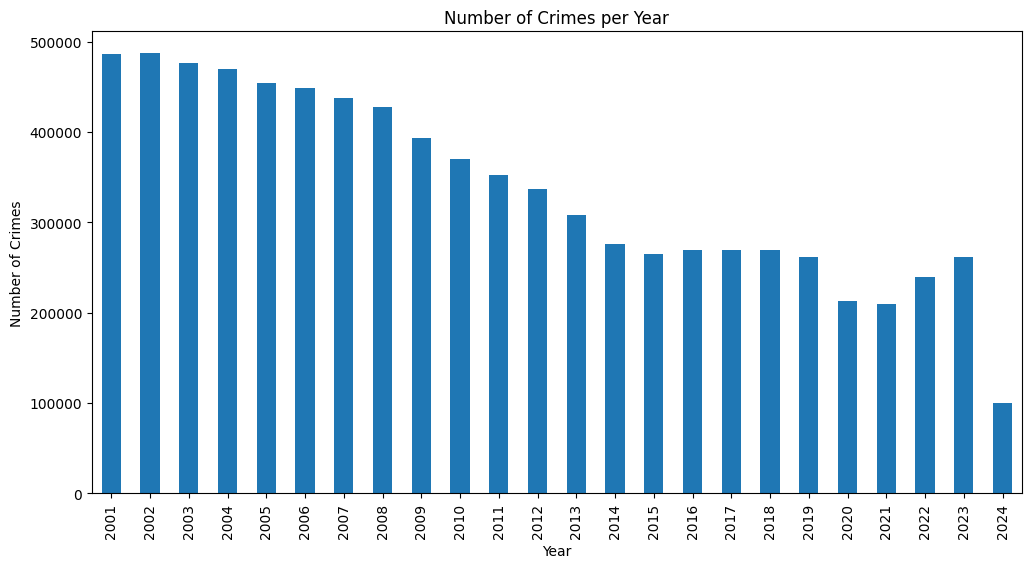

In [11]:
plt.figure(figsize=(12,6))
crimes_per_year.plot(kind='bar')
plt.title('Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

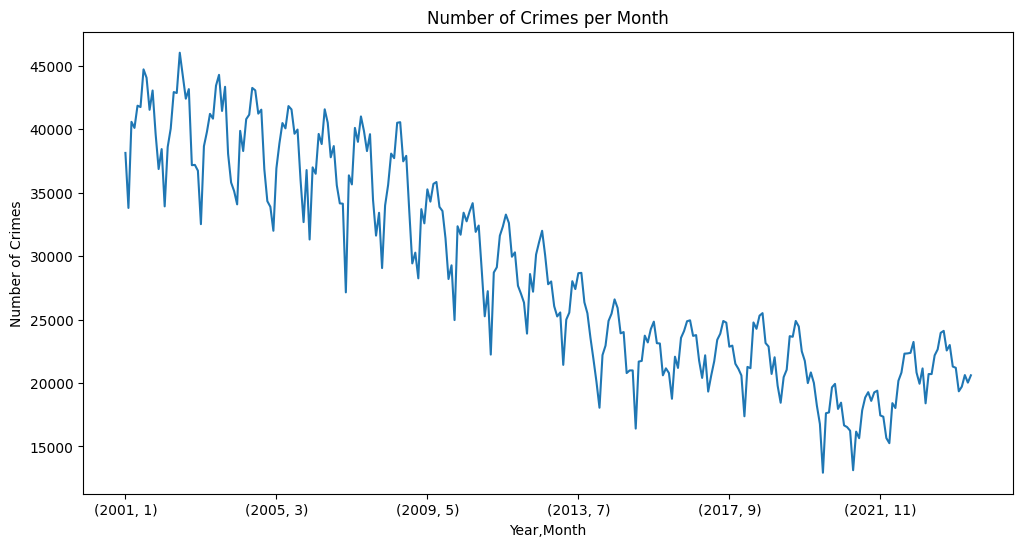

In [12]:
plt.figure(figsize=(12,6))
crimes_per_month.plot(kind='line')
plt.title('Number of Crimes per Month')
plt.ylabel('Number of Crimes')
plt.show()

In [13]:
year_to_analyse=2002
df_year=df[df['Year']==year_to_analyse]

In [14]:
crimes_per_month_=df_year.groupby('Month').size()

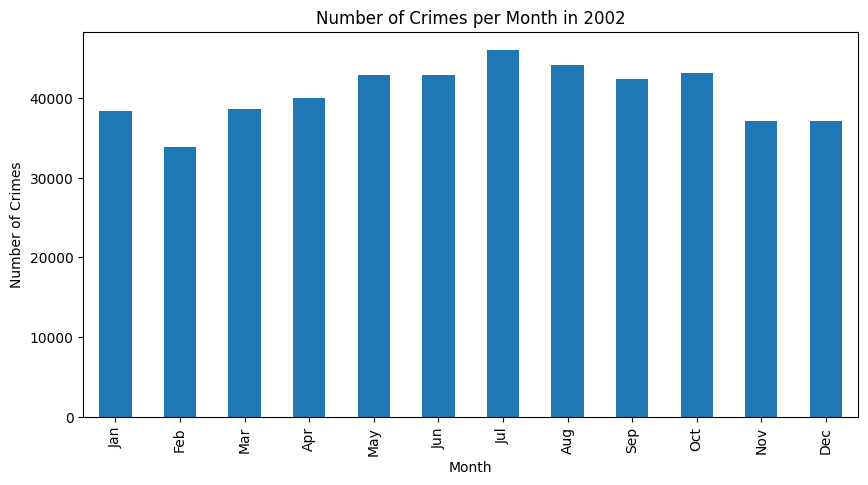

In [15]:
plt.figure(figsize=(10,5))
crimes_per_month_.plot(kind='bar')
plt.title(f'Number of Crimes per Month in {year_to_analyse}')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=range(12),labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [16]:
year_to_analyse=2002
month_to_analyse=7
df_month=df[(df['Year']==year_to_analyse)&(df['Month']==month_to_analyse)]

In [17]:
crimes_per_day=df_month.groupby('Day').size()

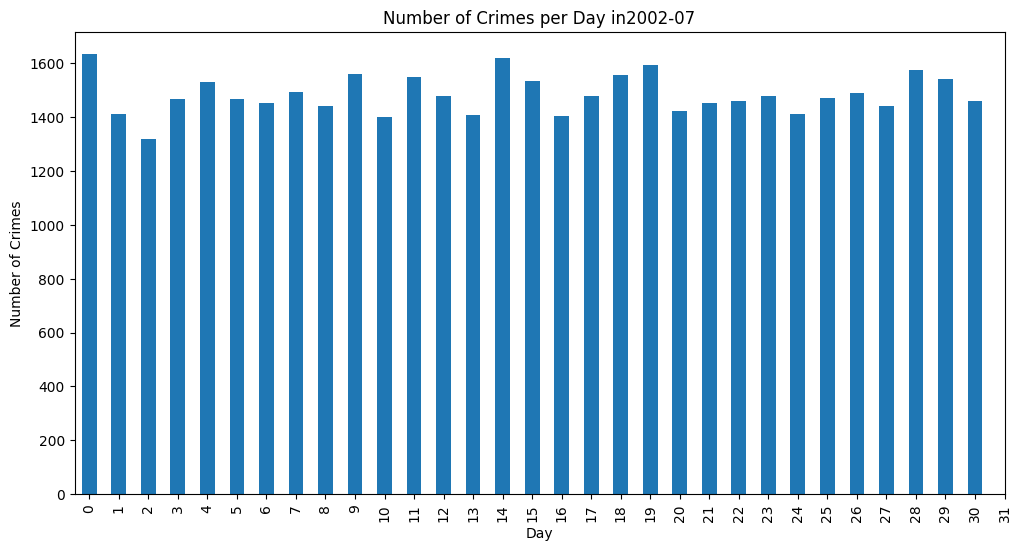

In [18]:
plt.figure(figsize=(12,6))
crimes_per_day.plot(kind='bar')
plt.title(f'Number of Crimes per Day in{year_to_analyse}-{month_to_analyse:02d}')
plt.xlabel('Day')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=range(0,32),labels=range(0,32))
plt.show()

In [19]:
specific_date='2007-07-02'
df_day=df[df['Date'].dt.strftime('%Y-%m-%d')==specific_date]

In [20]:
crimes_per_hour=df_day.groupby('Hour').size()

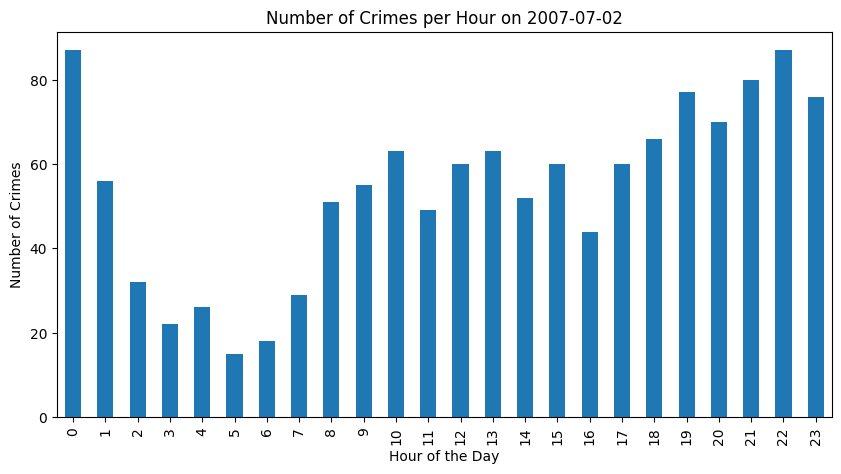

In [21]:
plt.figure(figsize=(10,5))
crimes_per_hour.plot(kind='bar')
plt.title(f'Number of Crimes per Hour on {specific_date}')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=range(24),labels=range(24))
plt.show()

In [22]:
df.head(3)

ID Case Number                Date                  Block  IUCR  \
0  5741943    HN549294 2007-08-25 09:22:18     074XX N ROGERS AVE  0560   
1    25953    JE240540 2021-05-24 15:06:00    020XX N LARAMIE AVE  0110   
2    26038    JE279849 2021-06-26 09:24:00  062XX N MC CORMICK RD  0110   

  Primary Type          Description Location Description  Arrest  Domestic  \
0      ASSAULT               SIMPLE                OTHER   False     False   
1     HOMICIDE  FIRST DEGREE MURDER               STREET    True     False   
2     HOMICIDE  FIRST DEGREE MURDER          PARKING LOT    True     False   

   ...  X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
0  ...           NaN           NaN  2007  08/17/2015 03:03:40 PM        NaN   
1  ...     1141387.0     1913179.0  2021  11/18/2023 03:39:49 PM  41.917838   
2  ...     1152781.0     1941458.0  2021  11/18/2023 03:39:49 PM  41.995219   

   Longitude                       Location  Month Day  Hour  
0        NaN                            NaN      8  25     9  
1 -87.755969  (41.917838056, -87.755968972)      5  24    15  
2 -87.713355  (41.995219444, -87.713354912)      6  26     9  

[3 rows x 25 columns]

In [23]:
df['Latitude'].value_counts()

Latitude
41.976290    14487
41.754593    10587
41.883500     8876
41.897895     4926
41.909664     3584
             ...  
41.743395        1
41.838470        1
41.953730        1
41.692628        1
41.875155        1
Name: count, Length: 898056, dtype: int64

In [24]:
import folium
from folium.plugins import HeatMap
import geopandas as gpd

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077151 entries, 0 to 8077150
Data columns (total 25 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int32         
 18  Updated On            object        
 19  

In [26]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, HeatMap

sample_size=10000
df_sample=df.sample(n=sample_size,random_state=42)

df_sample_clean=df_sample.dropna(subset=['Latitude','Longitude'])

#create a map centered at the mean latitude and longitude
m=folium.Map(location=[df_sample_clean['Latitude'].mean(),df_sample_clean['Longitude'].mean()],zoom_start=12)

#add marker cluster to the map
marker_cluster=MarkerCluster().add_to(m)

#add points to the cluster
for idx,row in df_sample_clean.iterrows():
    folium.Marker([row['Latitude'],row['Longitude']]).add_to(marker_cluster)
    
m.save('crime_cluster_map.html')

m

In [27]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'Hour'],
      dtype='object')

In [28]:
#load the district/ward boundaries

In [29]:
import geopandas as gpd
from shapely.geometry import Point

#read district boundaries
districts=gpd.read_file(r"D:\chicago crime\chicago.geojson")

#simplify the geometries
districts['geometry']=districts['geometry'].simplify(tolerance=0.01,preserve_topology=True)

#remove rows with missing or invalid coordinates
df_clean=df.dropna(subset=['Latitude','Longitude'])

#sample a subset of the data
sample_size=10000
df_sample=df_clean.sample(n=sample_size,random_state=42)

geometry=[Point(xy) for xy in zip(df_sample['Longitude'],df_sample['Latitude'])]
geo_df=gpd.GeoDataFrame(df_sample,geometry=geometry)

#ensure both geodataframes use the same coordinate refernce system(CRS)
geo_df=geo_df.set_crs(districts.crs,allow_override=True)

#perform spatial join to assign each point to a  district/ward
geo_df=gpd.sjoin(geo_df,districts,how='left',predicate='within')

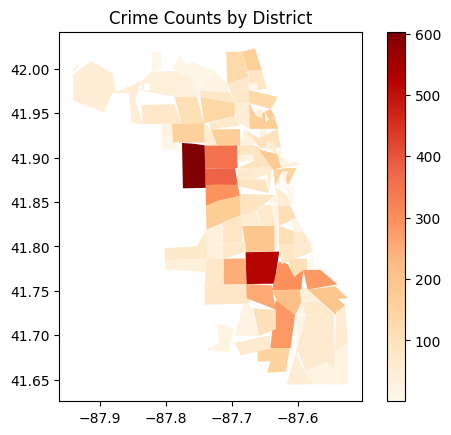

In [30]:
crime_by_district=geo_df.groupby("name").size().reset_index(name='Crime_Count')

districts=districts.merge(crime_by_district,on="name",how='left')

#fill NaN values in 'Crime_Count'  with 0(for districts with no crimes)
districts['Crime_count']=districts['Crime_Count'].fillna(0)

districts.plot(column='Crime_Count',cmap='OrRd',legend=True)
plt.title('Crime Counts by District')
plt.show()

In [31]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'Hour'],
      dtype='object')

# Crime Type Analysis
frequency of different 'Primary Type' and 'Description' fields

Severity Analysis: Investigate the distribution of severe crimes (e.g., homicides, assaults) versus less severe crimes (e.g., thefts, fraud).


In [32]:
df['Primary Type'].value_counts()

Primary Type
THEFT                                1706621
BATTERY                              1473440
CRIMINAL DAMAGE                       920174
NARCOTICS                             753859
ASSAULT                               533135
OTHER OFFENSE                         501905
BURGLARY                              432699
MOTOR VEHICLE THEFT                   404639
DECEPTIVE PRACTICE                    364844
ROBBERY                               304347
CRIMINAL TRESPASS                     219510
WEAPONS VIOLATION                     115738
PROSTITUTION                           70055
OFFENSE INVOLVING CHILDREN             57977
PUBLIC PEACE VIOLATION                 53297
SEX OFFENSE                            32327
CRIM SEXUAL ASSAULT                    27480
INTERFERENCE WITH PUBLIC OFFICER       19059
LIQUOR LAW VIOLATION                   15115
GAMBLING                               14638
ARSON                                  13828
HOMICIDE                               132

In [33]:
'''THEFT                                1706621
BATTERY                              1473440
CRIMINAL DAMAGE                       920174
NARCOTICS                             753859
ASSAULT                               533135
OTHER OFFENSE                         501905
BURGLARY                              432699
MOTOR VEHICLE THEFT                   404639
DECEPTIVE PRACTICE                    364844
ROBBERY                               304347
CRIMINAL TRESPASS                     219510
WEAPONS VIOLATION                     115738'''

'THEFT                                1706621\nBATTERY                              1473440\nCRIMINAL DAMAGE                       920174\nNARCOTICS                             753859\nASSAULT                               533135\nOTHER OFFENSE                         501905\nBURGLARY                              432699\nMOTOR VEHICLE THEFT                   404639\nDECEPTIVE PRACTICE                    364844\nROBBERY                               304347\nCRIMINAL TRESPASS                     219510\nWEAPONS VIOLATION                     115738'

In [34]:
df['Description'].value_counts()

Description
SIMPLE                                               947942
$500 AND UNDER                                       652335
DOMESTIC BATTERY SIMPLE                              631115
TO VEHICLE                                           451614
OVER $500                                            436781
                                                      ...  
DOMESTIC VIOLENCE                                         1
FINANCIAL IDENTITY THEFT: $300 & UNDER                    1
AGGRAVATED: HANDS / FIST / FEET NO / MINOR INJURY         1
MANUFACTURE / DELIVER - LOOK-ALIKE DRUG                   1
THEFT RETAIL                                              1
Name: count, Length: 553, dtype: int64

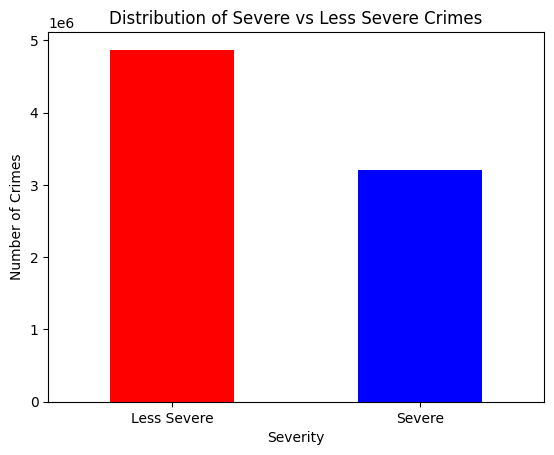

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Define severity categories (you may need to adjust these based on your data)
severe_crimes = ['HOMICIDE', 'ASSAULT','BATTERY','NARCOTICS','BURGLARY']
less_severe_crimes = ['THEFT', 'FRAUD','CRIMINAL DAMAGE','OTHER OFFENSE']

# Categorize crimes based on severity
df['Severity'] = df['Primary Type'].apply(lambda x: 'Severe' if x in severe_crimes else 'Less Severe')

# Group by severity and count the number of crimes in each category
severity_counts = df.groupby('Severity').size()

# Plot the distribution
severity_counts.plot(kind='bar', color=['red', 'blue'])
plt.title('Distribution of Severe vs Less Severe Crimes')
plt.xlabel('Severity')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.show()


# Arrest and Domestic Incident Analysis

Calculate the percentage of crimes that result in an arrest. This can be broken down by crime type, location, and time period.



In [36]:
df['Arrest'].value_counts()

Arrest
False    6005459
True     2071692
Name: count, dtype: int64

In [37]:
df['Domestic'].value_counts()

Domestic
False    6687738
True     1389413
Name: count, dtype: int64

In [38]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'Hour', 'Severity'],
      dtype='object')

In [39]:
df['Arrest']=df['Arrest'].astype(int)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077151 entries, 0 to 8077150
Data columns (total 26 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                int32         
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int32         
 18  Updated On            object        
 19  

In [41]:
df.head(3)

ID Case Number                Date                  Block  IUCR  \
0  5741943    HN549294 2007-08-25 09:22:18     074XX N ROGERS AVE  0560   
1    25953    JE240540 2021-05-24 15:06:00    020XX N LARAMIE AVE  0110   
2    26038    JE279849 2021-06-26 09:24:00  062XX N MC CORMICK RD  0110   

  Primary Type          Description Location Description  Arrest  Domestic  \
0      ASSAULT               SIMPLE                OTHER       0     False   
1     HOMICIDE  FIRST DEGREE MURDER               STREET       1     False   
2     HOMICIDE  FIRST DEGREE MURDER          PARKING LOT       1     False   

   ...  Y Coordinate  Year              Updated On   Latitude  Longitude  \
0  ...           NaN  2007  08/17/2015 03:03:40 PM        NaN        NaN   
1  ...     1913179.0  2021  11/18/2023 03:39:49 PM  41.917838 -87.755969   
2  ...     1941458.0  2021  11/18/2023 03:39:49 PM  41.995219 -87.713355   

                        Location  Month  Day Hour  Severity  
0                            NaN      8   25    9    Severe  
1  (41.917838056, -87.755968972)      5   24   15    Severe  
2  (41.995219444, -87.713354912)      6   26    9    Severe  

[3 rows x 26 columns]

In [42]:
df['Location Description'].value_counts()

Location Description
STREET                    2109844
RESIDENCE                 1341279
APARTMENT                  934492
SIDEWALK                   743902
OTHER                      270002
                           ...   
BEACH                           1
POOLROOM                        1
ROOF                            1
LAGOON                          1
JUNK YARD/GARBAGE DUMP          1
Name: count, Length: 217, dtype: int64

In [43]:
'''THEFT                                1706621
BATTERY                              1473440
CRIMINAL DAMAGE                       920174
NARCOTICS                             753859
ASSAULT                               533135
OTHER OFFENSE                         501905
BURGLARY                              432699
MOTOR VEHICLE THEFT                   404639
DECEPTIVE PRACTICE                    364844
ROBBERY                               304347
CRIMINAL TRESPASS                     219510
WEAPONS VIOLATION                     115738'''

'THEFT                                1706621\nBATTERY                              1473440\nCRIMINAL DAMAGE                       920174\nNARCOTICS                             753859\nASSAULT                               533135\nOTHER OFFENSE                         501905\nBURGLARY                              432699\nMOTOR VEHICLE THEFT                   404639\nDECEPTIVE PRACTICE                    364844\nROBBERY                               304347\nCRIMINAL TRESPASS                     219510\nWEAPONS VIOLATION                     115738'

In [44]:
primary_type='THEFT'
location_description='STREET'
month=7
day=14
hour=0

filtered_df=df[(df['Primary Type']==primary_type) &
               (df['Location Description']==location_description)&
               (df['Month']==month)&
               (df['Day']==day)&
               (df['Hour']==hour)]

total_crimes=filtered_df.shape[0]
arrests=filtered_df['Arrest'].sum()

arrest_rate=(arrests/total_crimes)*100

print(f"Total Crimes:{total_crimes}")
print(f"Arrests:{arrests}")
print(f"Arrest Rate: {arrest_rate:.2f}%")

Total Crimes:118
Arrests:4
Arrest Rate: 3.39%


In [45]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'Hour', 'Severity'],
      dtype='object')

In [46]:
df[df['Domestic']]['Primary Type'].value_counts()#Domestic is true

Primary Type
BATTERY                              781098
OTHER OFFENSE                        186426
ASSAULT                              156361
CRIMINAL DAMAGE                      105085
THEFT                                 60301
OFFENSE INVOLVING CHILDREN            43118
CRIMINAL TRESPASS                     11201
ROBBERY                                6442
DECEPTIVE PRACTICE                     5838
CRIM SEXUAL ASSAULT                    5465
BURGLARY                               5186
SEX OFFENSE                            5169
MOTOR VEHICLE THEFT                    3304
STALKING                               2902
PUBLIC PEACE VIOLATION                 2726
KIDNAPPING                             2552
CRIMINAL SEXUAL ASSAULT                2045
HOMICIDE                                916
ARSON                                   803
INTIMIDATION                            741
WEAPONS VIOLATION                       699
NARCOTICS                               610
INTERFERENCE WITH P

In [47]:
primary_type='BATTERY'
location_description='STREET'
month=7
day=14
hour=0

filtered_df=df[(df['Primary Type']==primary_type) &
               (df['Location Description']==location_description)&
               (df['Month']==month)&
               (df['Day']==day)&
               (df['Hour']==hour)]

total_crimes=filtered_df.shape[0]
arrests=filtered_df['Arrest'].sum()

arrest_rate=(arrests/total_crimes)*100

print(f"Total Crimes:{total_crimes}")
print(f"Arrests:{arrests}")
print(f"Arrest Rate: {arrest_rate:.2f}%")

Total Crimes:85
Arrests:16
Arrest Rate: 18.82%


In [48]:
df[~df['Domestic']]['Primary Type'].value_counts()#Domestic is false

Primary Type
THEFT                                1646320
CRIMINAL DAMAGE                       815089
NARCOTICS                             753249
BATTERY                               692342
BURGLARY                              427513
MOTOR VEHICLE THEFT                   401335
ASSAULT                               376774
DECEPTIVE PRACTICE                    359006
OTHER OFFENSE                         315479
ROBBERY                               297905
CRIMINAL TRESPASS                     208309
WEAPONS VIOLATION                     115039
PROSTITUTION                           70027
PUBLIC PEACE VIOLATION                 50571
SEX OFFENSE                            27158
CRIM SEXUAL ASSAULT                    22015
INTERFERENCE WITH PUBLIC OFFICER       18893
LIQUOR LAW VIOLATION                   15102
OFFENSE INVOLVING CHILDREN             14859
GAMBLING                               14620
ARSON                                  13025
HOMICIDE                               123

# Location Specific Analysis
 Investigate the most common locations for crimes (e.g., streets, parking lots, apartments) and see how crime types vary by location.

# Comparison by Beat and Community Area
Analyze crime data by beat and community area to identify localized crime patterns and hotspots.

In [49]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'Hour', 'Severity'],
      dtype='object')

In [50]:
df['Location Description'].value_counts()

Location Description
STREET                    2109844
RESIDENCE                 1341279
APARTMENT                  934492
SIDEWALK                   743902
OTHER                      270002
                           ...   
BEACH                           1
POOLROOM                        1
ROOF                            1
LAGOON                          1
JUNK YARD/GARBAGE DUMP          1
Name: count, Length: 217, dtype: int64

In [51]:
df['Location Description'].unique()

array(['OTHER', 'STREET', 'PARKING LOT', 'APARTMENT',
       'SMALL RETAIL STORE', 'GAS STATION',
       'PARKING LOT / GARAGE (NON RESIDENTIAL)', 'RESIDENCE - GARAGE',
       'RESIDENCE - PORCH / HALLWAY', 'CURRENCY EXCHANGE', 'RESIDENCE',
       'AUTO / BOAT / RV DEALERSHIP',
       'POLICE FACILITY / VEHICLE PARKING LOT', 'DEPARTMENT STORE',
       'CHA PARKING LOT / GROUNDS', 'RESTAURANT', 'GROCERY FOOD STORE',
       'APPLIANCE STORE', 'CAR WASH', 'HOSPITAL BUILDING / GROUNDS',
       'COMMERCIAL / BUSINESS OFFICE', 'SIDEWALK',
       'DRIVEWAY - RESIDENTIAL', 'OTHER (SPECIFY)', 'PARK PROPERTY',
       'ALLEY', 'BANK', 'DRUG STORE', 'VEHICLE NON-COMMERCIAL',
       'RESIDENCE - YARD (FRONT / BACK)', 'BAR OR TAVERN',
       'LAKEFRONT / WATERFRONT / RIVERBANK', 'SCHOOL - PUBLIC BUILDING',
       'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
       'NURSING / RETIREMENT HOME', 'HOTEL / MOTEL', 'CONVENIENCE STORE',
       'CTA BUS STOP', 'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE ARE

In [52]:
#(41.976290414, -87.905227221)
specific_latitude=41.976290414
specific_longitude=-87.905227221

map_center=[specific_latitude,specific_longitude]
specific_location_map=folium.Map(location=map_center,zoom_start=15)

folium.Marker(
    location=map_center,
    popup='Specific Location',
    icon=folium.Icon(color='red')
).add_to(specific_location_map)

specific_location_map

In [53]:
#(41.976290414, -87.905227221)
specific_latitude=41.976290414
specific_longitude=-87.905227221

filtered_df=df[(df['Latitude']==specific_latitude)&
               (df['Longitude']==specific_longitude)&
               (df['Location Description'].str.upper()=='STREET')]

primary_type_counts=filtered_df['Primary Type'].value_counts()

primary_type_counts

Primary Type
THEFT                  33
BATTERY                20
DECEPTIVE PRACTICE     19
NARCOTICS              18
CRIMINAL DAMAGE        13
ASSAULT                12
MOTOR VEHICLE THEFT    11
OTHER OFFENSE           8
ROBBERY                 3
CRIMINAL TRESPASS       2
BURGLARY                1
SEX OFFENSE             1
Name: count, dtype: int64

In [54]:
#(41.976290414, -87.905227221)
specific_latitude=41.976290414
specific_longitude=-87.905227221

filtered_df=df[(df['Latitude']==specific_latitude)&
               (df['Longitude']==specific_longitude)&
               (df['Location Description'].str.upper()=='APARTMENT')]

primary_type_counts=filtered_df['Primary Type'].value_counts()

primary_type_counts

Primary Type
DECEPTIVE PRACTICE    1
OTHER OFFENSE         1
Name: count, dtype: int64

In [55]:
#(41.976290414, -87.905227221)
specific_latitude=41.976290414
specific_longitude=-87.905227221

filtered_df=df[(df['Latitude']==specific_latitude)&
               (df['Longitude']==specific_longitude)&
               (df['Location Description'].str.upper()=='PARKING LOT / GARAGE (NON RESIDENTIAL)')]

primary_type_counts=filtered_df['Primary Type'].value_counts()

primary_type_counts

Primary Type
MOTOR VEHICLE THEFT    15
THEFT                  11
CRIMINAL DAMAGE         5
ASSAULT                 5
BATTERY                 3
DECEPTIVE PRACTICE      2
Name: count, dtype: int64

In [56]:
df['Location Description'].value_counts()

Location Description
STREET                    2109844
RESIDENCE                 1341279
APARTMENT                  934492
SIDEWALK                   743902
OTHER                      270002
                           ...   
BEACH                           1
POOLROOM                        1
ROOF                            1
LAGOON                          1
JUNK YARD/GARBAGE DUMP          1
Name: count, Length: 217, dtype: int64

In [57]:
#(41.976290414, -87.905227221)
specific_latitude=41.976290414
specific_longitude=-87.905227221

filtered_df=df[(df['Latitude']==specific_latitude)&
               (df['Longitude']==specific_longitude)&
               (df['Location Description'].str.upper()=='RESIDENCE')]

primary_type_counts=filtered_df['Primary Type'].value_counts()

primary_type_counts

Primary Type
THEFT                 3
CRIMINAL DAMAGE       1
DECEPTIVE PRACTICE    1
Name: count, dtype: int64

Analyze crime data by beat and community area to identify localized crime patterns and hotspots.

In [58]:
df['Beat'].value_counts()

Beat
421     62795
423     62048
1834    59089
624     56837
511     55360
        ...  
1652     1438
1655     1430
1650      137
430        19
310         5
Name: count, Length: 305, dtype: int64

In [59]:
df['Community Area'].value_counts()

Community Area
25.0    462423
8.0     265325
43.0    246005
23.0    231914
28.0    228672
         ...  
74.0     16688
12.0     13932
47.0     11112
9.0       7462
0.0         76
Name: count, Length: 78, dtype: int64

In [60]:
df[df['Beat']==421]['Location'].value_counts()

Location
(41.76015578, -87.556752911)     928
(41.75702248, -87.558073456)     747
(41.754691074, -87.557038686)    712
(41.751827103, -87.559231739)    523
(41.754823635, -87.551092573)    472
                                ... 
(41.758837325, -87.557795052)      1
(41.752039751, -87.551324272)      1
(41.75426853, -87.565216502)       1
(41.757911446, -87.55642079)       1
(41.7522681, -87.559922749)        1
Name: count, Length: 3742, dtype: int64

In [61]:
df[df['Community Area']==25.0]['Location'].value_counts()

Location
(41.909664252, -87.742728815)    3584
(41.884856209, -87.763346345)    1308
(41.880399914, -87.753008553)    1273
(41.909614875, -87.747016581)    1223
(41.880362084, -87.755847438)    1148
                                 ... 
(41.886319098, -87.773428919)       1
(41.876604377, -87.758965662)       1
(41.891121812, -87.762339408)       1
(41.914000905, -87.755827202)       1
(41.866758487, -87.766800316)       1
Name: count, Length: 30981, dtype: int64

In [62]:
# Filter for rows where 'Beat' is 421
beat_421_df = df[(df['Beat'] == 421)&(~df['Latitude'].isna())&(~df['Longitude'].isna())]

# Get the value counts for 'Location'
location_counts = beat_421_df['Location Description'].value_counts()

# Create a map centered around the average location
map_center = [beat_421_df['Latitude'].mean(), beat_421_df['Longitude'].mean()]
crime_map = folium.Map(location=map_center, zoom_start=13)

# Add points to the map
for location, count in location_counts.items():
    folium.CircleMarker(
        location=[beat_421_df.loc[beat_421_df['Location Description'] == location, 'Latitude'].iloc[0],
                  beat_421_df.loc[beat_421_df['Location Description'] == location, 'Longitude'].iloc[0]],
        radius=count * 2,  # Size proportional to the count
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"Location: {location}<br>Count: {count}"
    ).add_to(crime_map)

locations=beat_421_df[['Latitude','Longitude']].values.tolist()
folium.PolyLine(locations=locations,color='red',weight=2.5,opacity=1).add_to(crime_map)
# Save the map to an HTML file
crime_map

# Seasonal and Weather Impact
   - Seasonal Trends: Examine whether certain types of crimes are more prevalent in specific seasons (e.g., summer vs. winter).


In [63]:
df.head(2)

ID Case Number                Date                Block  IUCR  \
0  5741943    HN549294 2007-08-25 09:22:18   074XX N ROGERS AVE  0560   
1    25953    JE240540 2021-05-24 15:06:00  020XX N LARAMIE AVE  0110   

  Primary Type          Description Location Description  Arrest  Domestic  \
0      ASSAULT               SIMPLE                OTHER       0     False   
1     HOMICIDE  FIRST DEGREE MURDER               STREET       1     False   

   ...  Y Coordinate  Year              Updated On   Latitude  Longitude  \
0  ...           NaN  2007  08/17/2015 03:03:40 PM        NaN        NaN   
1  ...     1913179.0  2021  11/18/2023 03:39:49 PM  41.917838 -87.755969   

                        Location  Month  Day Hour  Severity  
0                            NaN      8   25    9    Severe  
1  (41.917838056, -87.755968972)      5   24   15    Severe  

[2 rows x 26 columns]

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077151 entries, 0 to 8077150
Data columns (total 26 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                int32         
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int32         
 18  Updated On            object        
 19  

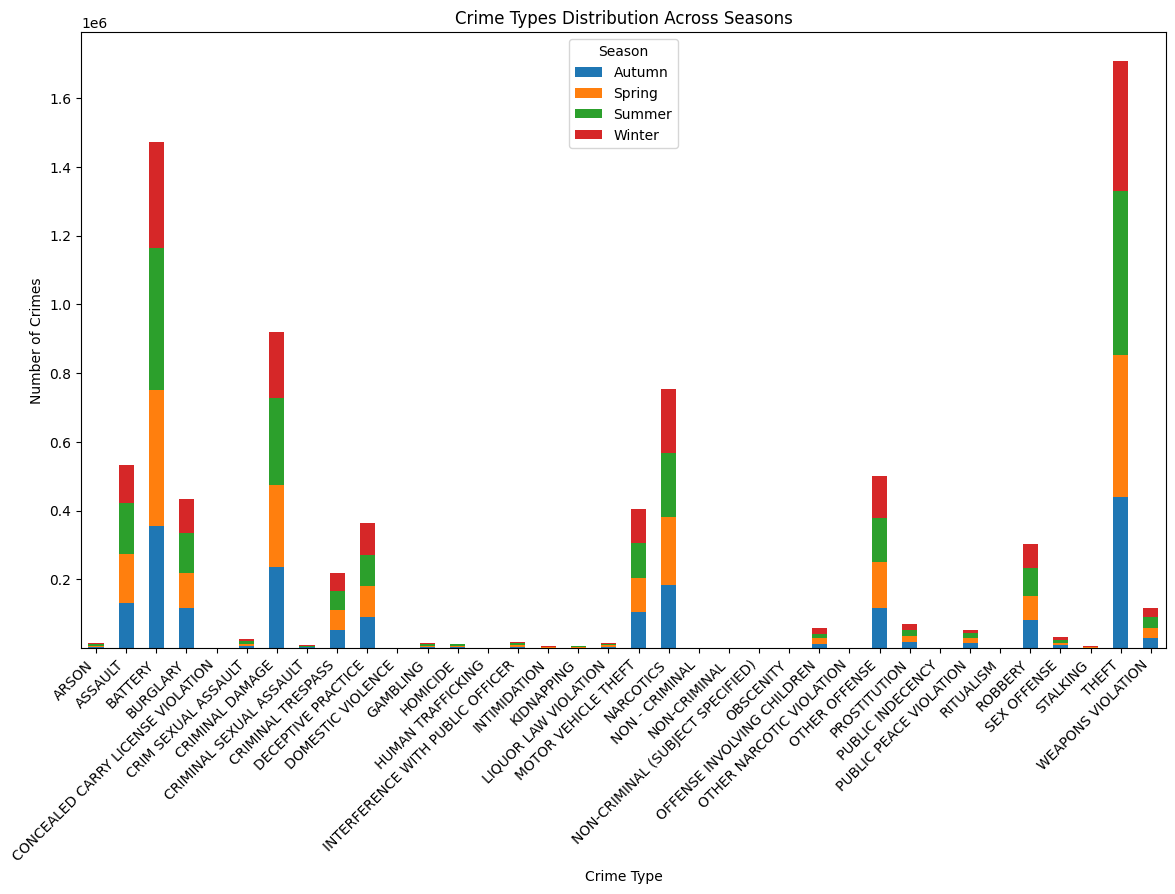

In [65]:
def get_season(date):
    month=date.month
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Date']=pd.to_datetime(df['Date'])
df['Season']=df['Date'].apply(get_season)

#group by 'Season' and 'Primary Type' and count the number of crimes
season_crime_counts=df.groupby(['Season','Primary Type']).size().reset_index(name='Crime_Count')

#pivot the table to have seasons as columns and crime types as rows
season_crime_pivot=season_crime_counts.pivot(index='Primary Type',columns='Season',values='Crime_Count')

#plot the distribution of crime types across seasons
season_crime_pivot.plot(kind='bar',stacked=True,figsize=(14,8))
plt.title('Crime Types Distribution Across Seasons')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.legend(title='Season')
plt.xticks(rotation=45,ha='right')
plt.show()

In [66]:
#winter had lesser crimes in general

# Repeat Offenders and Recidivism
   - Repeat Crime Locations: Identify locations that are repeatedly associated with criminal activity.
   - Recidivism Rates: If data on repeat offenders is available, analyze recidivism rates and factors contributing to repeat offenses.
 

In [67]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'Hour', 'Severity', 'Season'],
      dtype='object')

In [68]:
df['Block'].value_counts()

Block
100XX W OHARE ST            16697
001XX N STATE ST            16122
076XX S CICERO AVE          10396
0000X N STATE ST             9597
008XX N MICHIGAN AVE         9573
                            ...  
014XX E 97TH ST                 1
043XX S WESTERN BL              1
016XX S DAMEN AV                1
006XX S DAN RYAN EXPY IB        1
072XX S Phillips Ave            1
Name: count, Length: 63918, dtype: int64

In [69]:
df['Location'].value_counts()

Location
(41.976290414, -87.905227221)    14487
(41.754592961, -87.741528537)    10587
(41.883500187, -87.627876698)     8876
(41.897895128, -87.624096605)     4926
(41.909664252, -87.742728815)     3584
                                 ...  
(41.966553111, -87.785578247)        1
(41.779481459, -87.669776662)        1
(41.754936598, -87.561301714)        1
(41.745917682, -87.603968415)        1
(41.87515458, -87.633648765)         1
Name: count, Length: 899338, dtype: int64

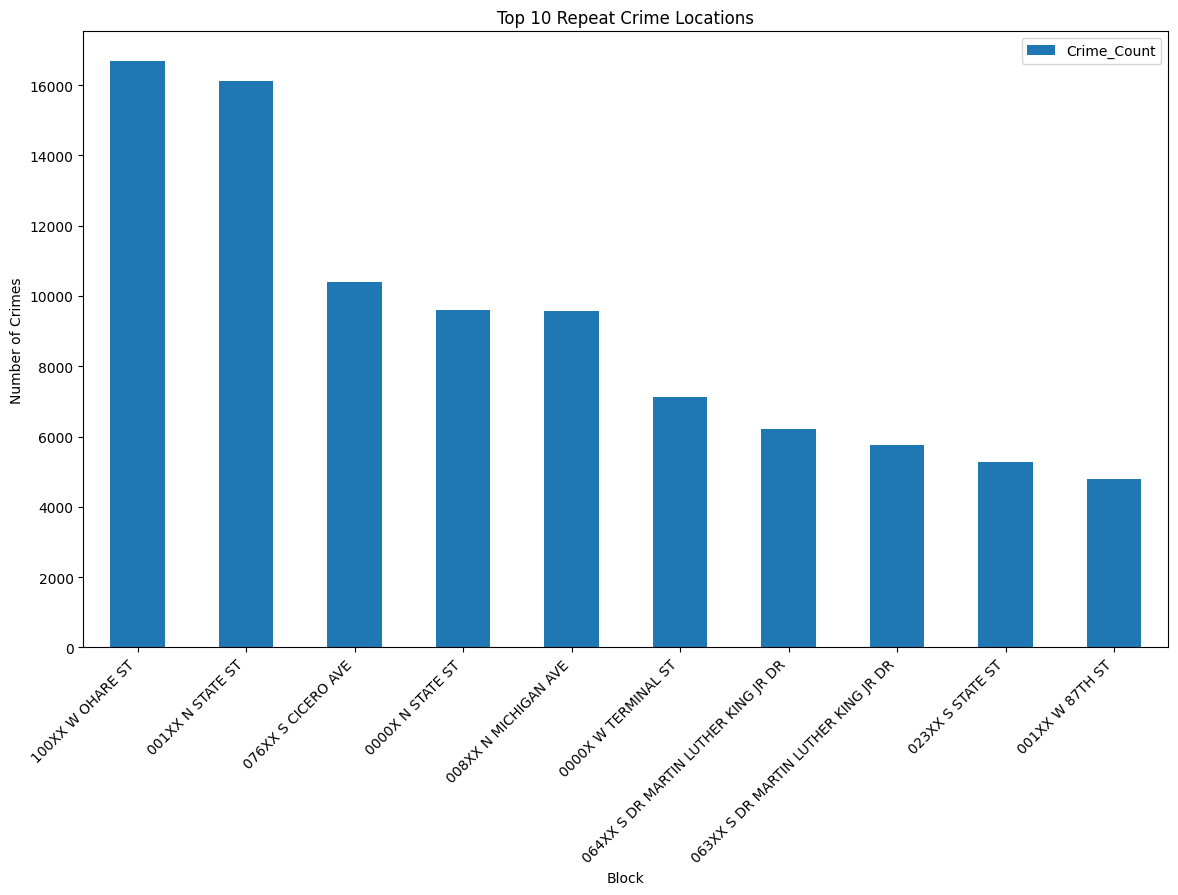

In [70]:
#group by 'Block' or 'Location Description' and count the number of crimes at each location
repeat_locations=df.groupby('Block').size().reset_index(name='Crime_Count')

#sort the locations by the number of crimes
repeat_locations=repeat_locations.sort_values(by='Crime_Count',ascending=False)

#display the top 10 locations with the most crimes
top_repeat_locations=repeat_locations.head(10)

#plot the top 10 repeat crime locations
top_repeat_locations.plot(kind='bar',x='Block',y='Crime_Count',figsize=(14,8))
plt.title('Top 10 Repeat Crime Locations')
plt.xlabel('Block')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45,ha='right')
plt.show()

In [71]:
(top_repeat_locations)


Block  Crime_Count
60303                     100XX W OHARE ST        16697
1854                      001XX N STATE ST        16122
54703                   076XX S CICERO AVE        10396
500                       0000X N STATE ST         9597
8361                  008XX N MICHIGAN AVE         9573
1223                   0000X W TERMINAL ST         7123
50093  064XX S DR MARTIN LUTHER KING JR DR         6212
49545  063XX S DR MARTIN LUTHER KING JR DR         5766
22089                     023XX S STATE ST         5286
2211                       001XX W 87TH ST         4792

In [72]:
#group by 'ID' and count the number of distinct 'Case Number' for each ID
recidivism=df.groupby('ID')['Case Number'].nunique().reset_index(name='Case_Count')

#calculate recidivism rates
recidivism_rate=recidivism['Case_Count'].value_counts().sort_index()


In [73]:
recidivism_rate

Case_Count
1    8077151
Name: count, dtype: int64

In [74]:
recidivism

ID  Case_Count
0             634           1
1             635           1
2             636           1
3             637           1
4             638           1
...           ...         ...
8077146  13485438           1
8077147  13485441           1
8077148  13485462           1
8077149  13485472           1
8077150  13485473           1

[8077151 rows x 2 columns]

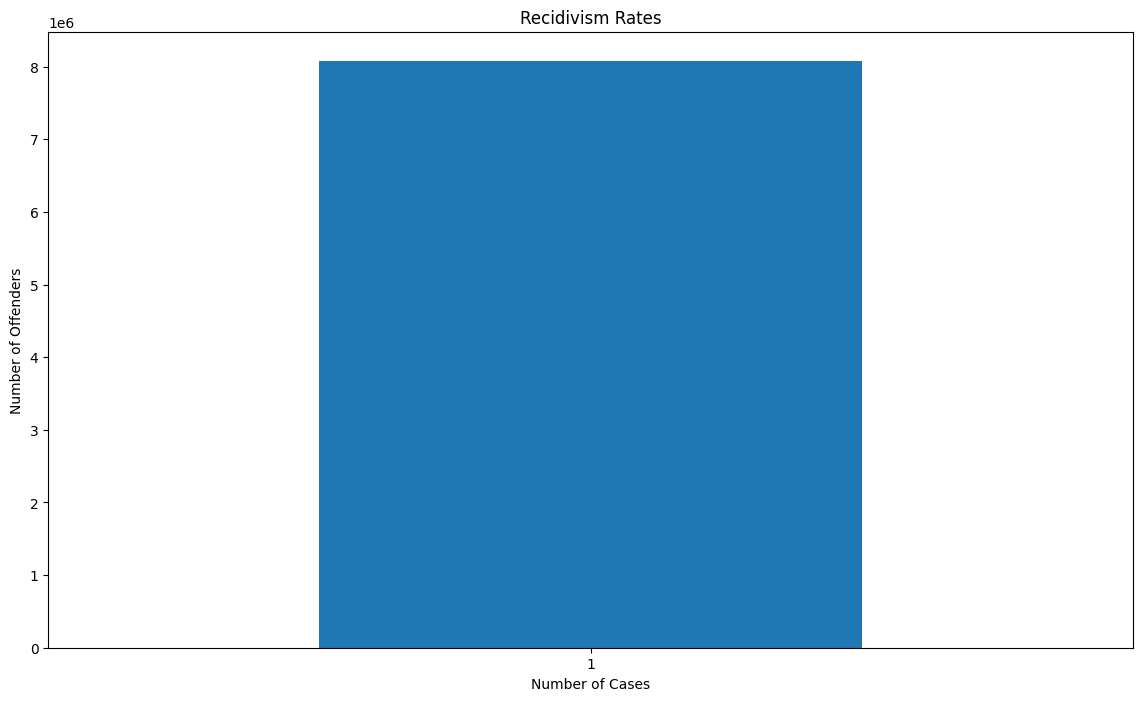

In [75]:

#plot the recidivism rates
recidivism_rate.plot(kind='bar',figsize=(14,8))
plt.title('Recidivism Rates')
plt.xlabel('Number of Cases')
plt.ylabel('Number of Offenders')
plt.xticks(rotation=0)
plt.show()

# Predictive Modeling and Risk Assessment
   - Predictive Analysis: Develop models to predict future crime incidents based on historical data, time, location, and other relevant factors.
   - Risk Assessment: Assess the risk of different areas and times for specific types of crimes to help in resource allocation for law enforcement.


In [76]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'Hour', 'Severity', 'Season'],
      dtype='object')

In [77]:
df['DayOfWeek']=df['Date'].dt.dayofweek

In [78]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'Hour', 'Severity', 'Season', 'DayOfWeek'],
      dtype='object')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077151 entries, 0 to 8077150
Data columns (total 28 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                int32         
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int32         
 18  Updated On            object        
 19  

In [80]:
df.duplicated().sum()

0

In [81]:
df['IsWeekend']=df['DayOfWeek'].apply(lambda x:1 if x>=5 else 0)

In [82]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'Hour', 'Severity', 'Season', 'DayOfWeek',
       'IsWeekend'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077151 entries, 0 to 8077150
Data columns (total 29 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                int32         
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int32         
 18  Updated On            object        
 19  

In [84]:
df['IUCR'].value_counts()

IUCR
0820    652351
0486    631115
0460    579500
0810    436794
1320    436040
         ...  
1624         1
1521         1
9901         1
1633         1
0130         1
Name: count, Length: 405, dtype: int64

In [85]:
df['X Coordinate'].value_counts()

X Coordinate
1100658.0    14487
1145727.0    10623
1176352.0    10063
1177338.0     7323
1176436.0     4931
             ...  
1199665.0        1
1201078.0        1
1126863.0        1
1126654.0        1
1201708.0        1
Name: count, Length: 79152, dtype: int64

Date,Block, Primary Type,Description,Location Description,Arrest,Domestic,Beat,District, Ward,Community Area, Year, Location, Month,Day,Hour,Season,DayOfWeek,IsWeekend

In [86]:
df['Location Description'].value_counts()

Location Description
STREET                    2109844
RESIDENCE                 1341279
APARTMENT                  934492
SIDEWALK                   743902
OTHER                      270002
                           ...   
BEACH                           1
POOLROOM                        1
ROOF                            1
LAGOON                          1
JUNK YARD/GARBAGE DUMP          1
Name: count, Length: 217, dtype: int64

In [87]:
df['Severity'].value_counts()

Severity
Less Severe    4870791
Severe         3206360
Name: count, dtype: int64

In [88]:
df['Season'].value_counts()

Season
Summer    2180508
Spring    2065058
Autumn    2020778
Winter    1810807
Name: count, dtype: int64

In [89]:
df['Description'].value_counts()

Description
SIMPLE                                               947942
$500 AND UNDER                                       652335
DOMESTIC BATTERY SIMPLE                              631115
TO VEHICLE                                           451614
OVER $500                                            436781
                                                      ...  
DOMESTIC VIOLENCE                                         1
FINANCIAL IDENTITY THEFT: $300 & UNDER                    1
AGGRAVATED: HANDS / FIST / FEET NO / MINOR INJURY         1
MANUFACTURE / DELIVER - LOOK-ALIKE DRUG                   1
THEFT RETAIL                                              1
Name: count, Length: 553, dtype: int64

In [90]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'Hour', 'Severity', 'Season', 'DayOfWeek',
       'IsWeekend'],
      dtype='object')

In [91]:
df1=df.copy()

df1=pd.get_dummies(df1,columns=['Block','Primary Type','Description',
                                'Location Description','Location',
                                'Season'],drop_first=True)
MemoryError: Unable to allocate 481. GiB for an array with shape (8077151, 63918) and data type bool


In [92]:
def frequency_encoding(df,column):
    freq=df[column].value_counts()/len(df)
    df[f'{column}_freq_enc']=df[column].map(freq)
    df.drop(column,axis=1,inplace=True)

In [93]:
#frequency encoding for high cardinality features
for col in['Block','Description', 
           'Location Description', 'Location', 'Season']:
    frequency_encoding(df1,col)
    


In [94]:
df1.head()

ID Case Number                Date  IUCR Primary Type  Arrest  \
0   5741943    HN549294 2007-08-25 09:22:18  0560      ASSAULT       0   
1     25953    JE240540 2021-05-24 15:06:00  0110     HOMICIDE       1   
2     26038    JE279849 2021-06-26 09:24:00  0110     HOMICIDE       1   
3  13279676    JG507211 2023-11-09 07:30:00  0620     BURGLARY       0   
4  13274752    JG501049 2023-11-12 07:59:00  0454      BATTERY       1   

   Domestic  Beat  District  Ward  ...  Day Hour  Severity  DayOfWeek  \
0     False  2422      24.0  49.0  ...   25    9    Severe          5   
1     False  2515      25.0  36.0  ...   24   15    Severe          0   
2     False  1711      17.0  50.0  ...   26    9    Severe          5   
3     False  1922      19.0  47.0  ...    9    7    Severe          3   
4     False   632       6.0   6.0  ...   12    7    Severe          6   

   IsWeekend Block_freq_enc  Description_freq_enc  \
0          1       0.000076              0.117361   
1          0       0.000034              0.001628   
2          1       0.000038              0.001628   
3          0       0.000012              0.014641   
4          1       0.000267              0.000265   

   Location Description_freq_enc  Location_freq_enc  Season_freq_enc  
0                       0.033428                NaN         0.269960  
1                       0.261211       8.666422e-07         0.255667  
2                       0.000033       3.590375e-06         0.269960  
3                       0.115696       1.114254e-06         0.250185  
4                       0.019337       1.239298e-04         0.250185  

[5 rows x 29 columns]

In [95]:
df1.columns

Index(['ID', 'Case Number', 'Date', 'IUCR', 'Primary Type', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Month', 'Day', 'Hour', 'Severity', 'DayOfWeek',
       'IsWeekend', 'Block_freq_enc', 'Description_freq_enc',
       'Location Description_freq_enc', 'Location_freq_enc',
       'Season_freq_enc'],
      dtype='object')

In [96]:
df1['Block_freq_enc'].value_counts()

Block_freq_enc
0.002067    16697
0.001996    16122
0.000023    15416
0.000022    14774
0.000017    14280
            ...  
0.000100      804
0.000099      803
0.000099      802
0.000084      679
0.000083      671
Name: count, Length: 1643, dtype: int64

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay


In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077151 entries, 0 to 8077150
Data columns (total 29 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   ID                             int64         
 1   Case Number                    object        
 2   Date                           datetime64[ns]
 3   IUCR                           object        
 4   Primary Type                   object        
 5   Arrest                         int32         
 6   Domestic                       bool          
 7   Beat                           int64         
 8   District                       float64       
 9   Ward                           float64       
 10  Community Area                 float64       
 11  FBI Code                       object        
 12  X Coordinate                   float64       
 13  Y Coordinate                   float64       
 14  Year                           int32         
 15  Updated On     

In [99]:
X = df1[['Date', 'Block_freq_enc', 'Description_freq_enc', 'Location Description_freq_enc', 
        'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 
        'Year', 'Location_freq_enc', 'Month', 'Day', 'Hour', 'Season_freq_enc', 
        'DayOfWeek', 'IsWeekend']]
Y = df1['Primary Type']


In [100]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077151 entries, 0 to 8077150
Data columns (total 29 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   ID                             int64         
 1   Case Number                    object        
 2   Date                           datetime64[ns]
 3   IUCR                           object        
 4   Primary Type                   object        
 5   Arrest                         int32         
 6   Domestic                       bool          
 7   Beat                           int64         
 8   District                       float64       
 9   Ward                           float64       
 10  Community Area                 float64       
 11  FBI Code                       object        
 12  X Coordinate                   float64       
 13  Y Coordinate                   float64       
 14  Year                           int32         
 15  Updated On     

In [119]:
import seaborn as sns

[[   1    1    4    0    0    0    1    0    0    5    0    0    0    0
     0    0    2    6    0    1    3    0    0    1    0    0    1    0]
 [   0  284  562    1    0    0    0    0    6   34    0    0    0    0
     0    0    2   36    0    1   33    1    0   29    0    0    1   10]
 [   0  129 2633    2    0    0    1    0    7   37    0    0    0    0
     0    0    8   58    0    7   27    2    1   51    1    0    1   10]
 [   0    1    3  810    0    0    2    0    1   16    0    0    0    0
     0    0    1   16    0    0   20    0    0    2    0    0   17    0]
 [   0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    1    0    0    0    0    0    0    0    0    0    0]
 [   0    0    7    4    0    1    2    0    1   14    0    0    0    0
     0    0    3    6    0    2    4    0    1    3    0    0    1    0]
 [   0    2    2    1    0    0 1745    0    1   39    0    0    0    0
     0    0    5   16    0    1    6    1    0    8    0  

c:\Users\HP\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                   precision    recall  f1-score   support

                            ARSON       1.00      0.04      0.07        26
                          ASSAULT       0.64      0.28      0.39      1000
                          BATTERY       0.79      0.89      0.84      2975
                         BURGLARY       0.95      0.91      0.93       889
CONCEALED CARRY LICENSE VIOLATION       0.00      0.00      0.00         2
              CRIM SEXUAL ASSAULT       0.33      0.02      0.04        49
                  CRIMINAL DAMAGE       0.97      0.94      0.95      1854
          CRIMINAL SEXUAL ASSAULT       0.00      0.00      0.00        13
                CRIMINAL TRESPASS       0.89      0.73      0.80       421
               DECEPTIVE PRACTICE       0.57      0.77      0.65       741
                         GAMBLING       0.83      0.16      0.27        31
                         HOMICIDE       0.67      0.07      0.13        28
 INTERFERENCE WITH PUBLI

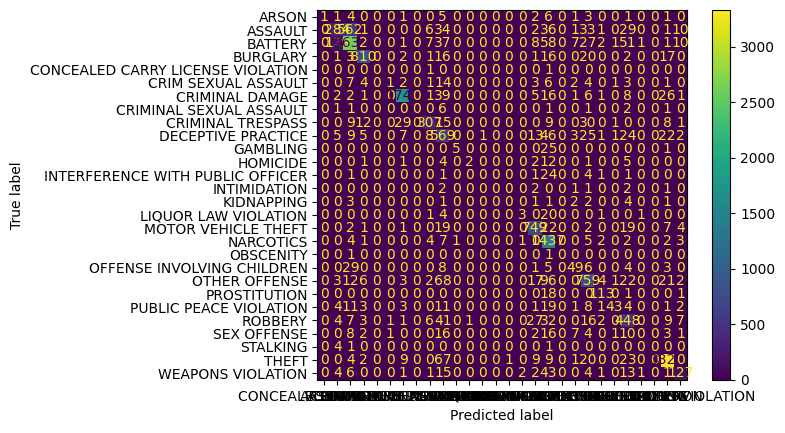

In [102]:
# Take a random sample of your DataFrame
sample_df = df1.sample(frac=0.01, random_state=42)  # Adjust the fraction as needed

# Define your features and target
X = sample_df[['Block_freq_enc', 'Description_freq_enc', 'Location Description_freq_enc', 
               'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 
               'Year', 'Location_freq_enc', 'Month', 'Day', 'Hour', 'Season_freq_enc', 
               'DayOfWeek', 'IsWeekend']]

Y = sample_df['Primary Type']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the Random Forest model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print(classification_report(y_test, y_pred))
print('---------------------------')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [109]:
import folium
from folium.plugins import HeatMap
import numpy as np

# Predict probabilities for risk assessment
probs = rfc.predict_proba(X_test)

# Assuming 'High Risk' for the highest predicted probability of crime types
high_risk_threshold = 0.7  # Adjust the threshold as needed
high_risk = (probs.max(axis=1) > high_risk_threshold)

# Create a DataFrame with the risk assessment
risk_assessment = X_test.copy()
risk_assessment['Risk'] = np.where(high_risk, 'High', 'Low')

# Add the original latitude and longitude to the risk assessment
risk_assessment['Latitude'] = df.loc[X_test.index, 'Latitude'].values
risk_assessment['Longitude'] = df.loc[X_test.index, 'Longitude'].values

# Remove rows with NaN values in 'Latitude' and 'Longitude'
risk_assessment = risk_assessment.dropna(subset=['Latitude', 'Longitude'])

# Plot high-risk areas on a map
high_risk_df = risk_assessment[risk_assessment['Risk'] == 'High']

# Create a folium map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=9)

# Add heatmap for high-risk areas
heat_data = [[row['Latitude'], row['Longitude']] for index, row in high_risk_df.iterrows()]
HeatMap(heat_data).add_to(m)

#display heat map
m

In [110]:
#assuming df is your dataframe
#group by district and Month to calculate crime counts
crime_by_area_time=df.groupby(['District','Month','Primary Type']).size().reset_index(name='Crime_Count')

#normalize by the total number of crimes to get crime rates
total_crimes=df.groupby(['District','Month']).size().reset_index(name='Total_Crimes')
crime_by_area_time=crime_by_area_time.merge(total_crimes,on=['District','Month'])
crime_by_area_time['Crime_Rate']=crime_by_area_time['Crime_Count']/crime_by_area_time['Total_Crimes']

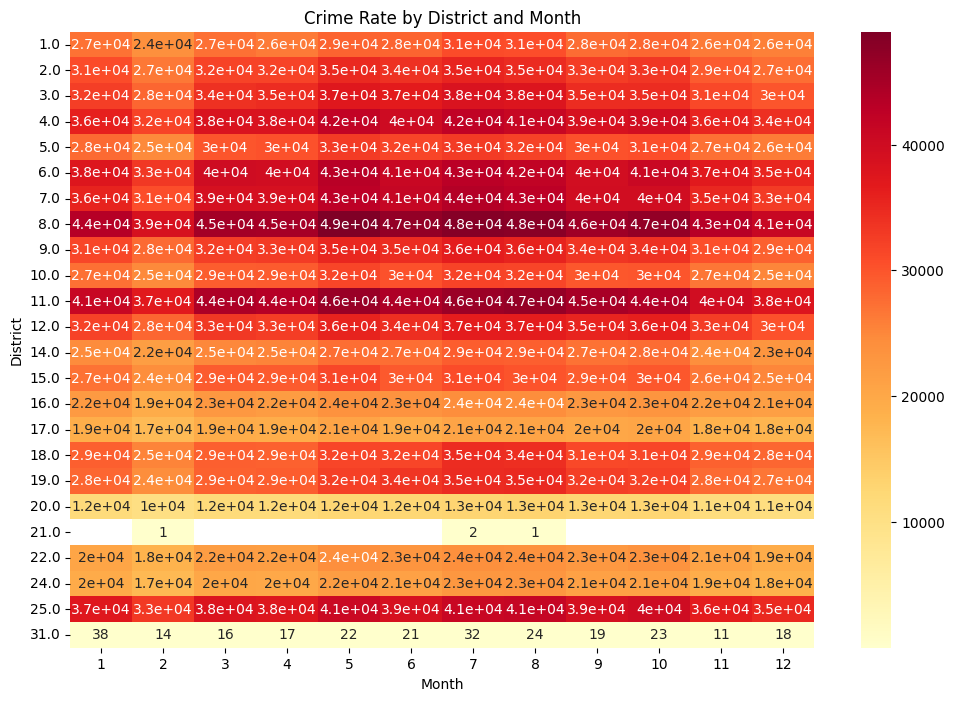

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'District' and 'Month' and calculate the aggregate crime rate
crime_by_area_time = df.groupby(['District', 'Month']).size().reset_index(name='Crime_Rate')

# Pivot the data for heatmap
heatmap_data = crime_by_area_time.pivot(index='District', columns='Month', values='Crime_Rate')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True)
plt.title('Crime Rate by District and Month')
plt.xlabel('Month')
plt.ylabel('District')
plt.show()


In [116]:
df['District'].value_counts()

District
8.0     542275
11.0    515767
6.0     472535
7.0     462325
25.0    458455
4.0     458205
3.0     409598
12.0    403281
9.0     393310
2.0     383192
19.0    364851
18.0    364175
5.0     356754
10.0    347720
15.0    343144
1.0     330813
14.0    311815
16.0    271185
22.0    264121
24.0    245847
17.0    233522
20.0    143955
31.0       255
21.0         4
Name: count, dtype: int64

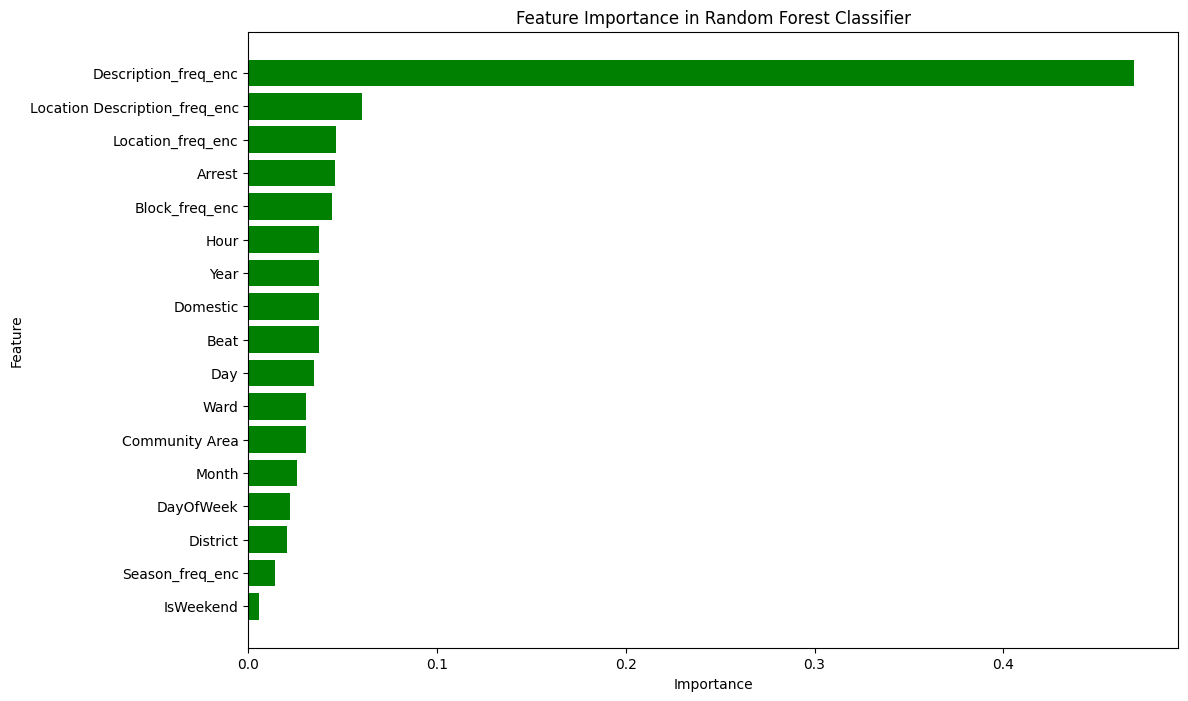

In [121]:
#retrieving feature importances
feature_importances=rfc.feature_importances_ 
feature_names=X.columns 

#creating a DataFrame for visualization
feature_importance_df=pd.DataFrame({'Feature':feature_names,'Importance':feature_importances})
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)

#plotting feature importances
plt.figure(figsize=(12,8))
plt.barh(feature_importance_df['Feature'],feature_importance_df['Importance'],color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Classifier')
plt.gca().invert_yaxis()#to display most important feature at the top
plt.show()

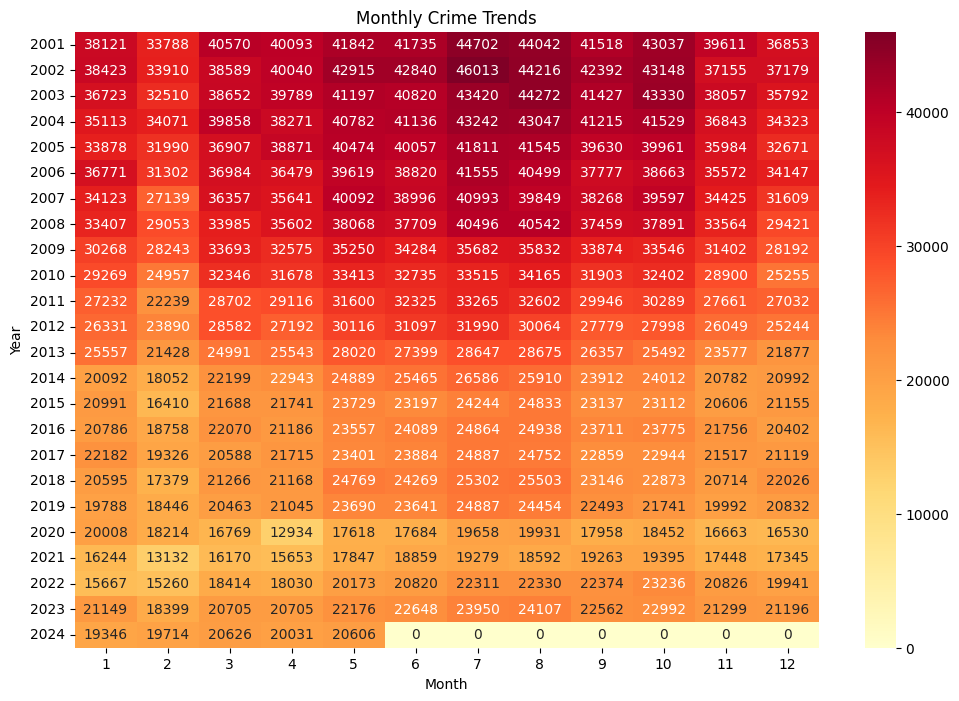

In [122]:
#trend and Seasonal Variation Analysis
monthly_trends=df.groupby(['Year','Month']).size().unstack().fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(monthly_trends,cmap='YlOrRd',annot=True,fmt='g')
plt.title('Monthly Crime Trends')
plt.show()

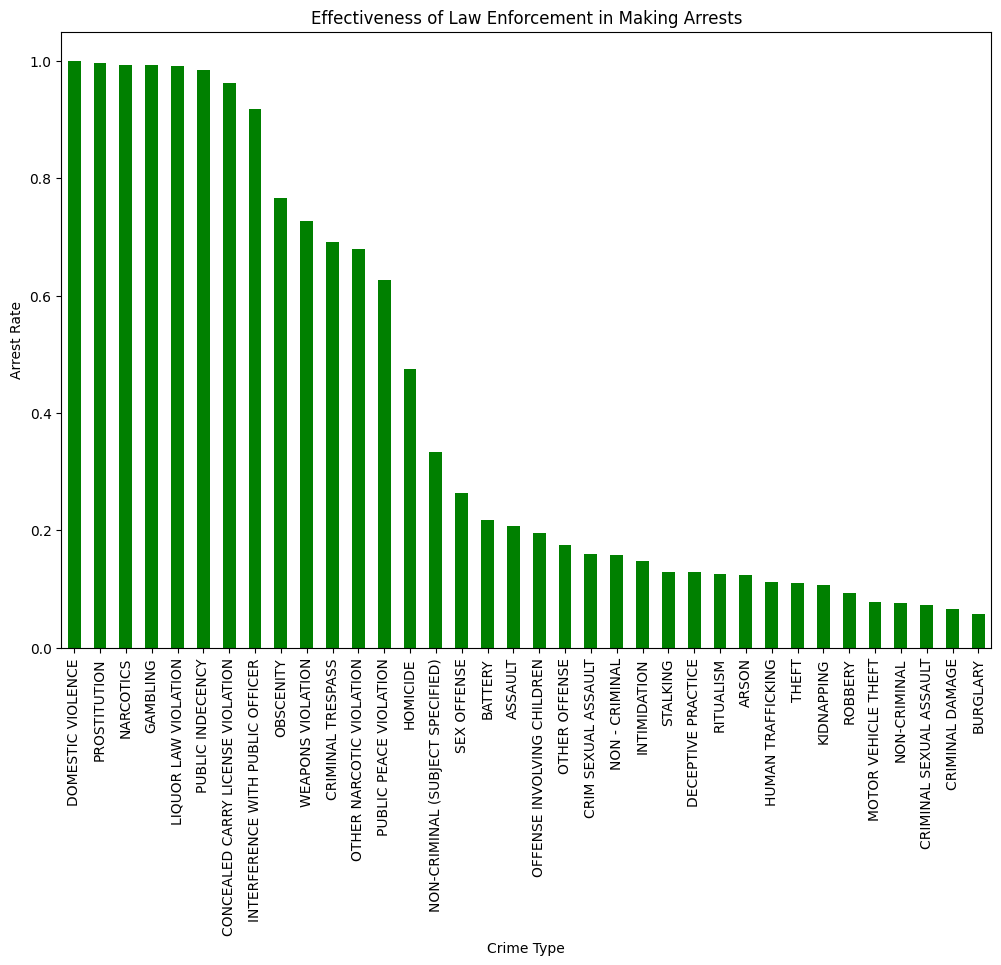

In [124]:
#effectiveness of law enforcement in maing arrests
arrest_rate=df.groupby('Primary Type')['Arrest'].mean()
plt.figure(figsize=(12,8))
arrest_rate.sort_values(ascending=False).plot(kind='bar',color='green')
plt.xlabel('Crime Type')
plt.ylabel('Arrest Rate')
plt.title('Effectiveness of Law Enforcement in Making Arrests')
plt.xticks(rotation=90)
plt.show()

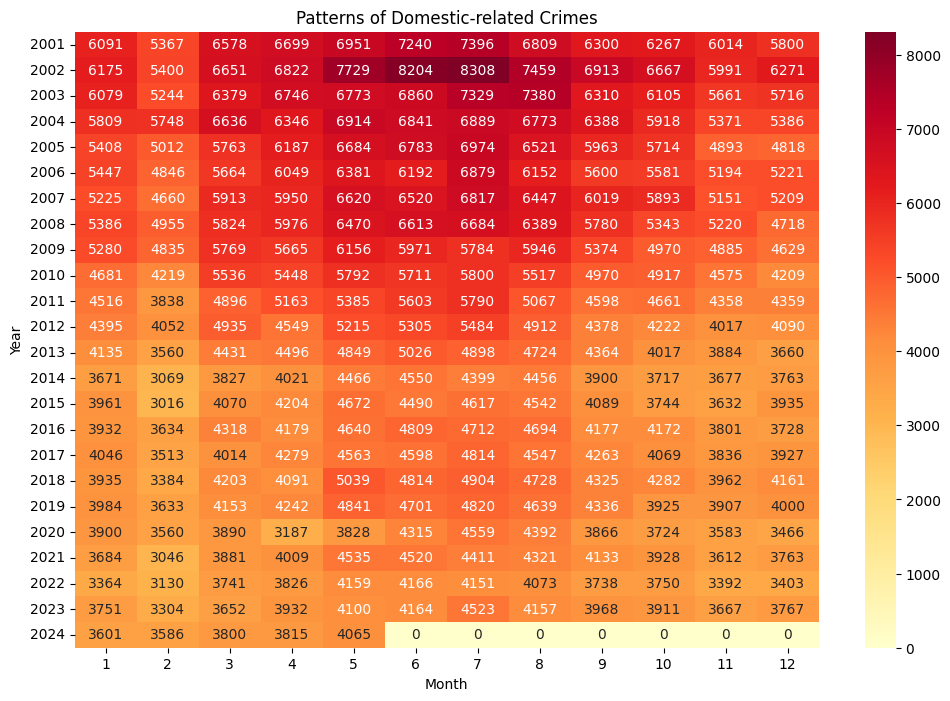

In [125]:
#Patternsof domestic-related crimes
domestic_crime_pattern=df[df['Domestic']==True].groupby(['Year','Month']).size().unstack().fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(domestic_crime_pattern,cmap='YlOrRd',annot=True,fmt='g')
plt.title('Patterns of Domestic-related Crimes')
plt.show()

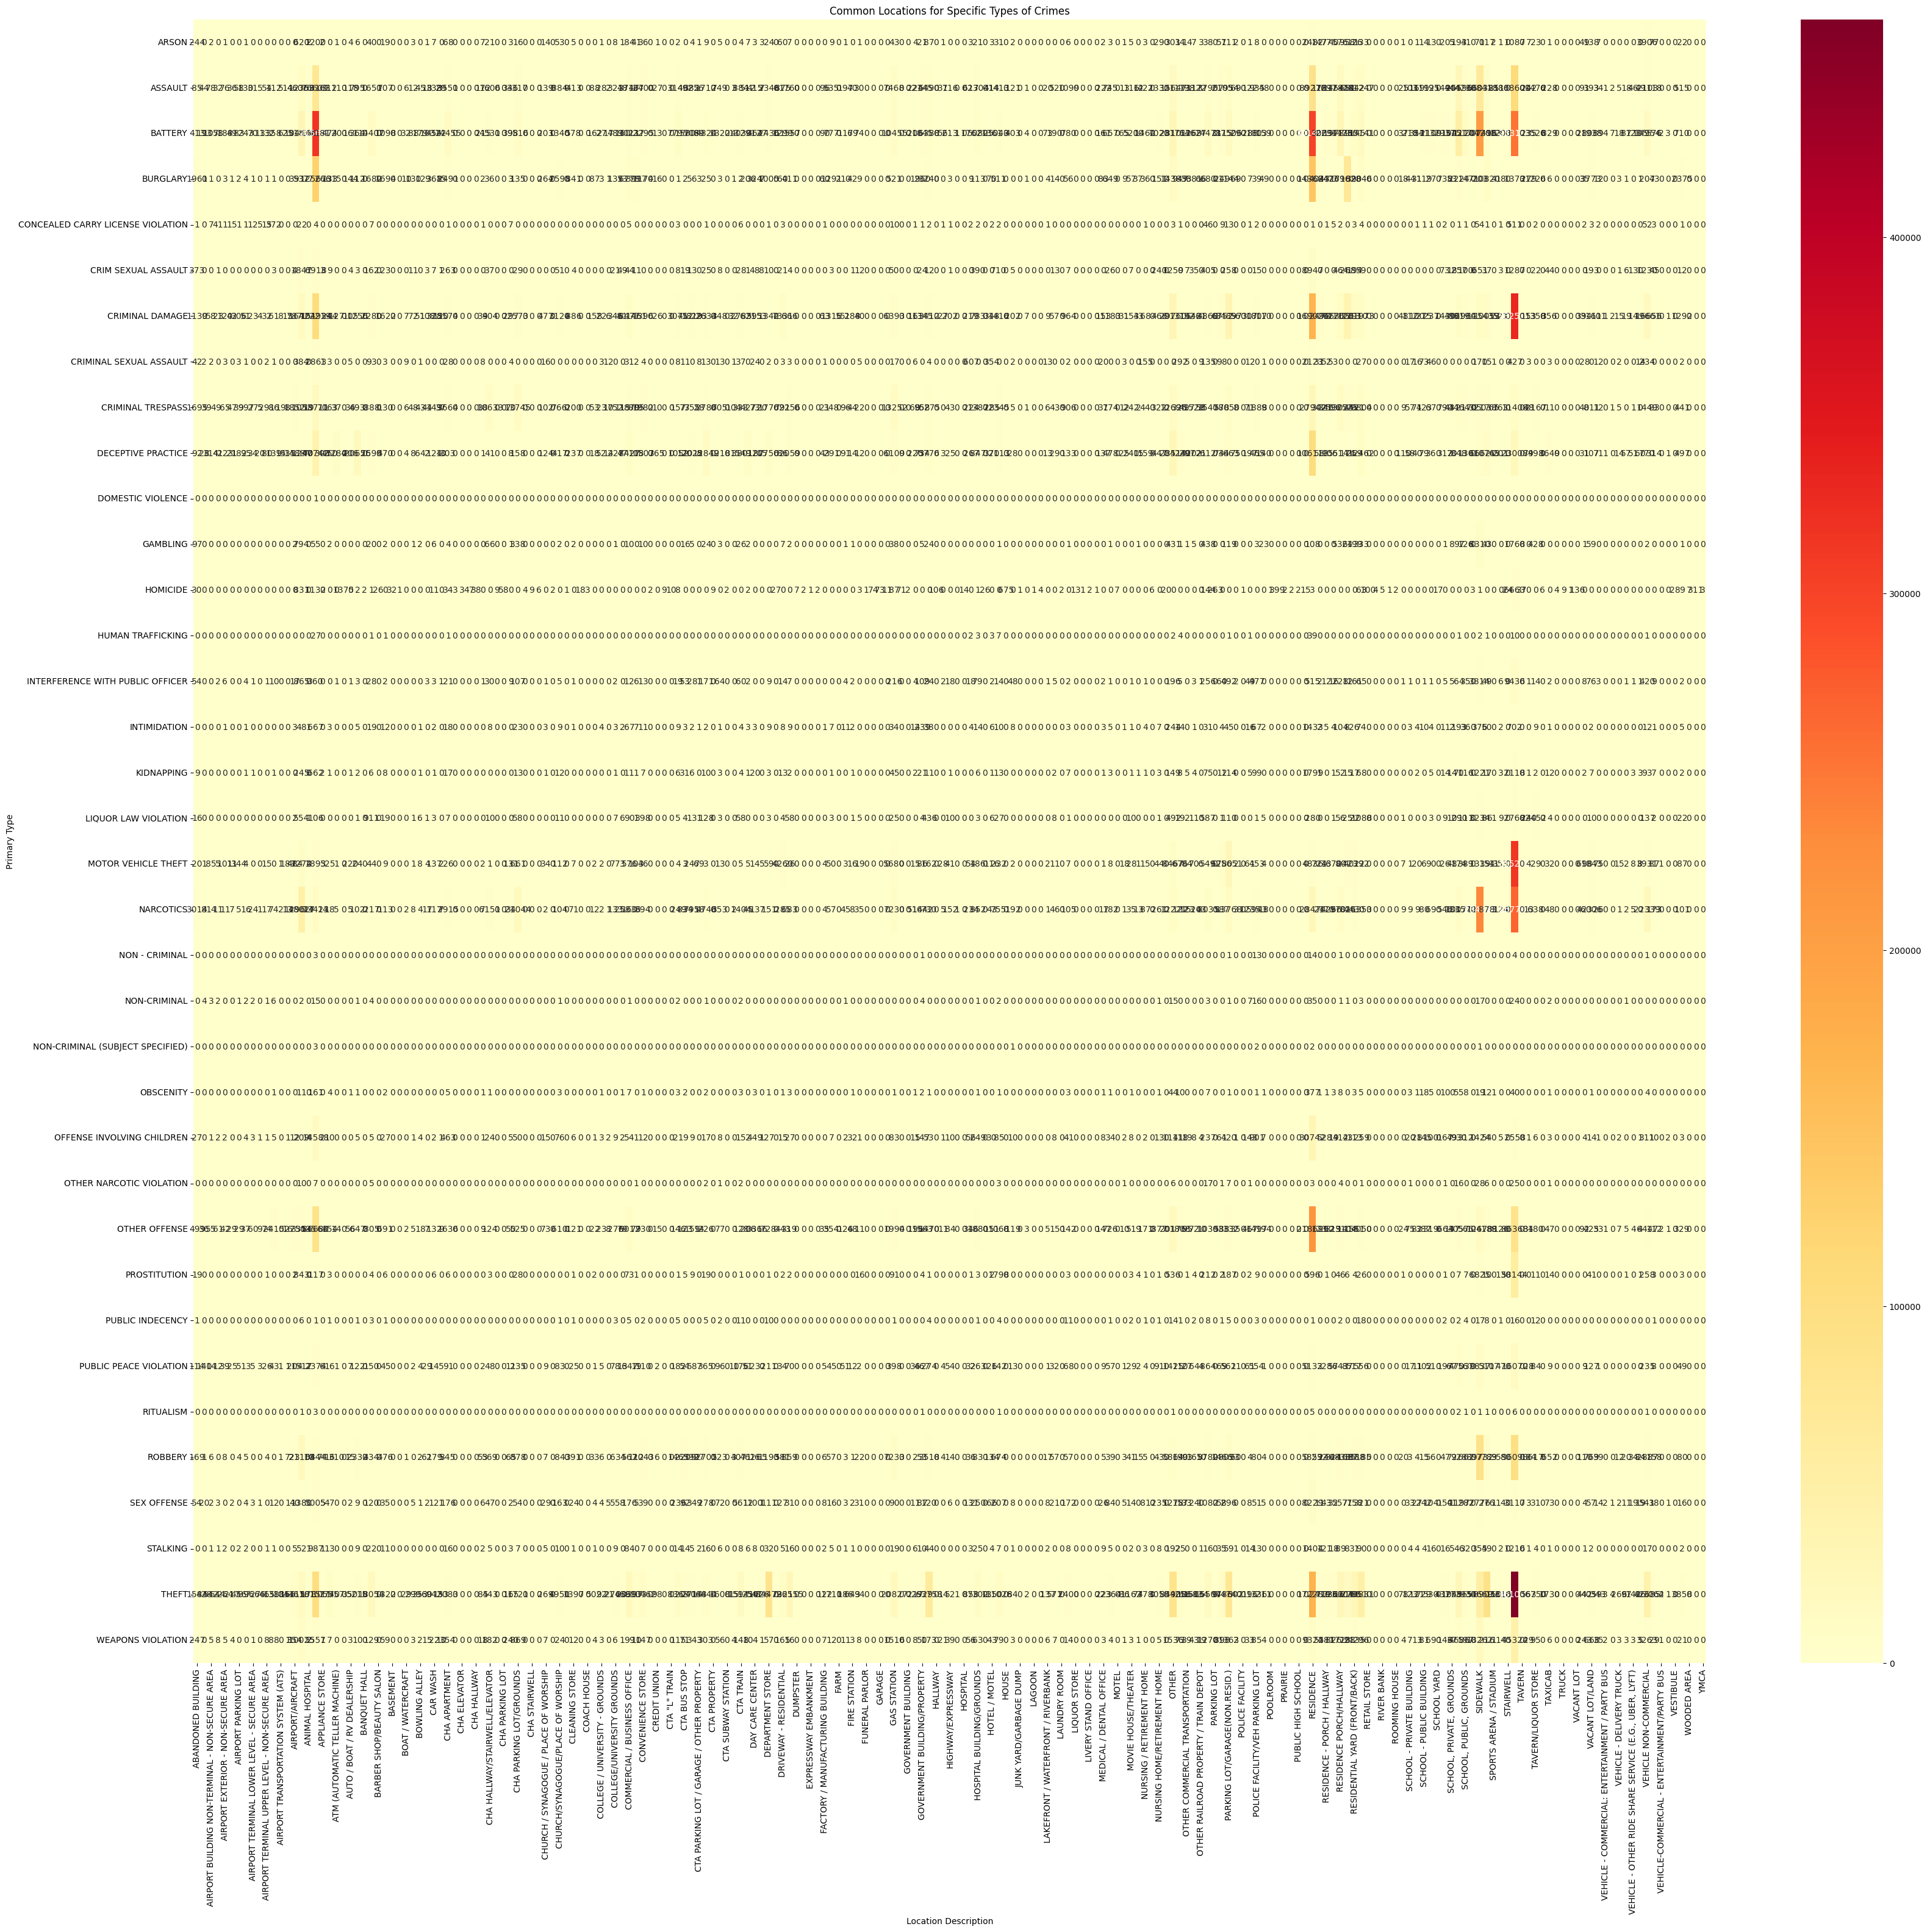

In [129]:
#common locations for specific types of crimes
common_locations=df.groupby(['Primary Type','Location Description']).size().unstack().fillna(0)
plt.figure(figsize=(40,35))
sns.heatmap(common_locations,cmap='YlOrRd',annot=True,fmt='g')
plt.title('Common Locations for Specific Types of Crimes')
plt.show()

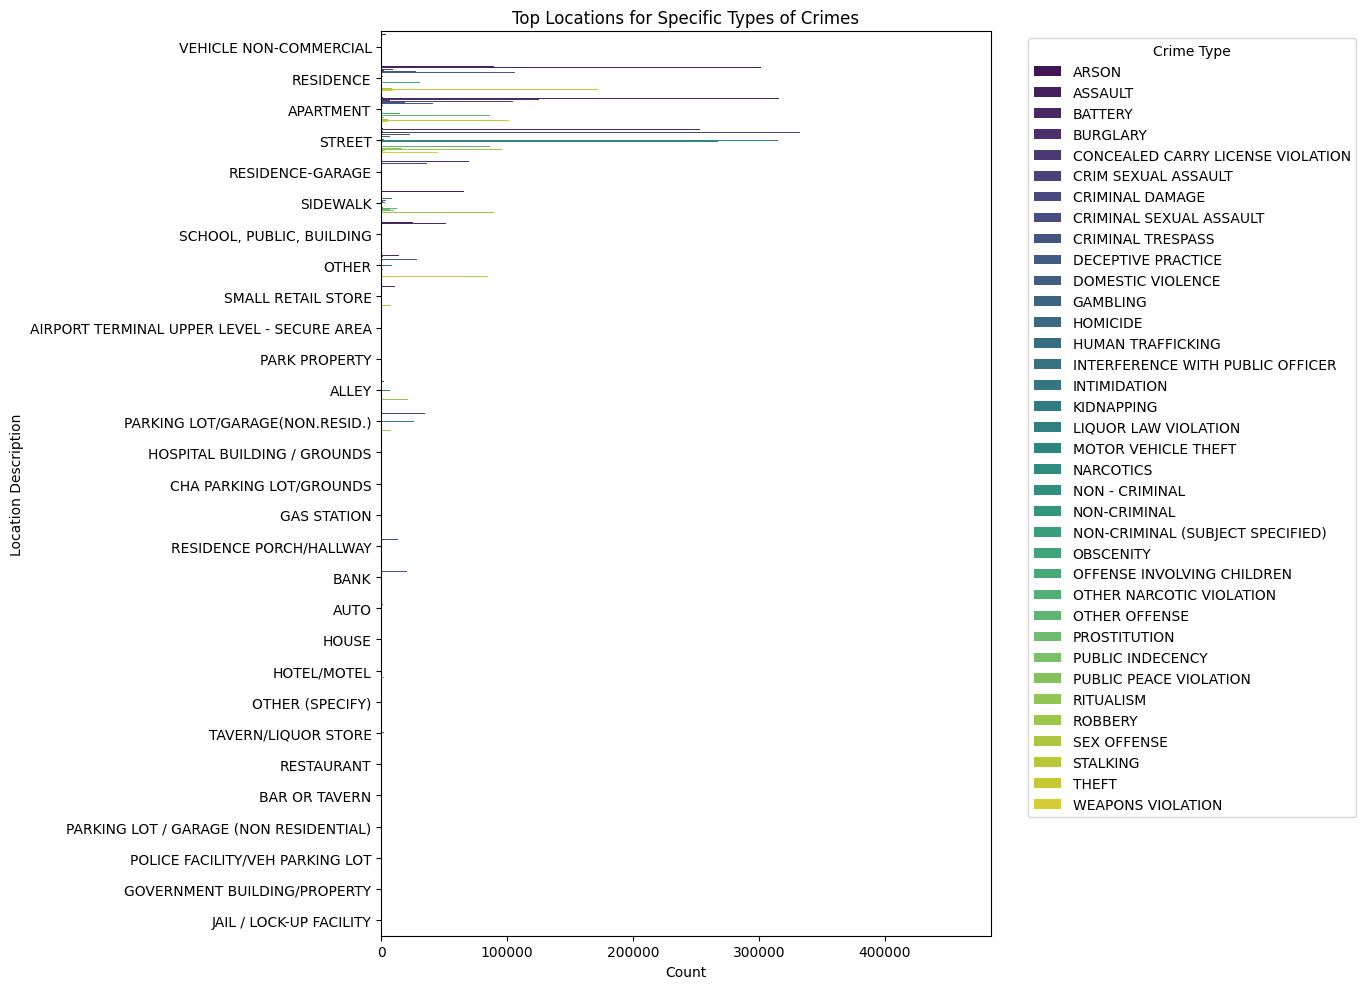

In [130]:
# Get the top N locations for each type of crime
top_locations = df.groupby(['Primary Type', 'Location Description']).size().groupby(level=0, group_keys=False).nlargest(5)

# Reset index to make the groupby results accessible as columns
top_locations_df = top_locations.reset_index(name='Count')

# Plotting the bar chart
plt.figure(figsize=(14, 10))
sns.barplot(x='Count', y='Location Description', hue='Primary Type', data=top_locations_df, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Location Description')
plt.title('Top Locations for Specific Types of Crimes')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
